Working with a larger example (multiclass classification)
When you have more than two classes as an option, it's known as multi-class classification.

- This means if you have 3 different classes, it's multi-class classification.
- It also means if you have 100 different classes, it's multi-class classification.
- To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

### Preparing the data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

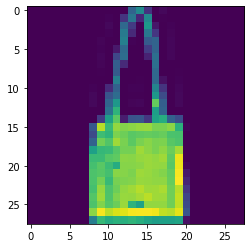

In [5]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[200]);

In [8]:
# Check out samples label
train_labels[5]

2

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

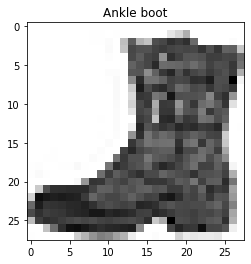

In [17]:
# Plot an example image and its label
index_of_choice = 150
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

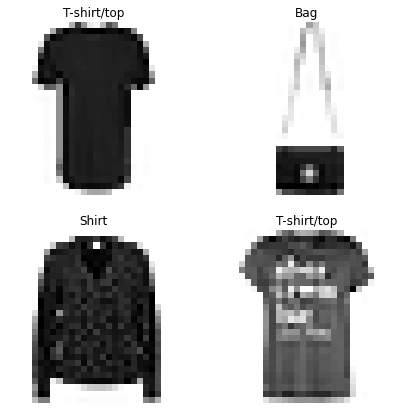

In [18]:
# Plot multiple random images of fashion MNIST
import random 
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Building a multi-class classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

- Input shape = 28 x 28 (the shape of one image)
- Output shape = 10 (one per class of clothing)
- Loss function = tf.keras.losses.CategoricalCrosstentropy()
    - If your labels are one-hot encoded, use CategoricalCrossentropy()
    - If your labels are integer form use SparseCategoricalCrossentropy()
- Output layer activation = Softmax (not sigmoid)

In [19]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [20]:
28 * 28

784

In [22]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [27]:
#Now create the model

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='Softmax') # 10 output layers because we have 10 class names
])

#2. compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#3. Fit the model
model_1_history = model_1.fit(train_data,train_labels,epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


In [31]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [33]:
tf.one_hot(train_labels, depth=10).shape

TensorShape([60000, 10])

In [34]:
#Now create the model

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='Softmax') # 10 output layers because we have 10 class names
])

#2. compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#3. Fit the model
model_1_history = model_1.fit(train_data,tf.one_hot(train_labels, depth=10),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2505 - accuracy: 0.1409
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7365 - accuracy: 0.3071
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5615 - accuracy: 0.3500
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5205 - accuracy: 0.3583
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5053 - accuracy: 0.3589
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4944 - accuracy: 0.3628
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4885 - accuracy: 0.3638
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4897 - accuracy: 0.3659
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4769 - accuracy: 0.3683
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.475

In [38]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Now create the model

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='Softmax') # 10 output layers because we have 10 class names
])

#2. compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# Now use model fit on validation data.
model_2_history = model_2.fit(train_data,tf.one_hot(train_labels, depth=10),epochs=10,validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6572 - accuracy: 0.1015 - val_loss: 2.2681 - val_accuracy: 0.1171
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2487 - accuracy: 0.1294 - val_loss: 2.1704 - val_accuracy: 0.1555
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1765 - accuracy: 0.1550 - val_loss: 2.1577 - val_accuracy: 0.1568
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0764 - accuracy: 0.1877 - val_loss: 1.8110 - val_accuracy: 0.2442
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6858 - accuracy: 0.3105 - val_loss: 1.6235 - val_accuracy: 0.3403
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5736 - accuracy: 0.3485 - val_loss: 1.5533 - val_accuracy: 0.3509
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5368 - accuracy: 0.3598 - val_loss: 1.5336 - val_accuracy:

In [39]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

### Normalizing our data

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [44]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [53]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model 
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_3.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))
     

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

<AxesSubplot:title={'center':'Normailzed data'}>

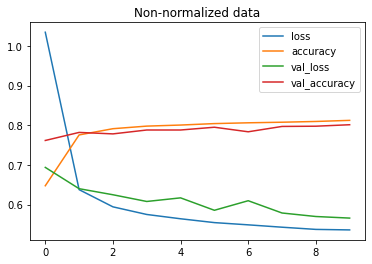

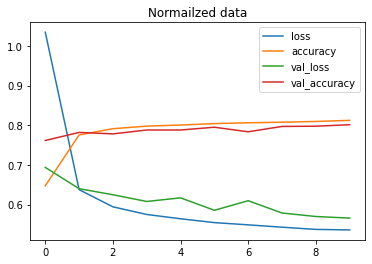

In [55]:
import pandas as pd 
# Plot non-normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normailzed data")

### Finding the ideal learning rate

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_4.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

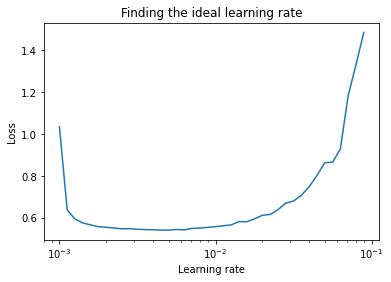

In [57]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [59]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")                       
])

# Compile model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### Evaluating our multi-class classification model

To Evaluate our multi-class classification model we could:

- Evaluate its performance using other classification metrics (such as a confusion matrix)
- Assess some of its predictions (through visualizations)
- Improve its results (by training it for longer or changing the architecutre)
- Save and export it for use in an application

In [60]:
# Make some predictions with our model 
y_probs = model_5.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

array([[8.56303084e-11, 3.53619044e-13, 2.66337793e-05, 4.63562060e-08,
        5.09498059e-05, 9.61191505e-02, 8.17783601e-08, 9.18689370e-02,
        4.06052405e-03, 8.07873666e-01],
       [3.42786507e-06, 1.28993628e-16, 9.59891379e-01, 2.05162934e-07,
        1.53292380e-02, 2.45321043e-13, 2.41429582e-02, 1.13832739e-28,
        6.32720999e-04, 4.47890400e-08],
       [6.10628922e-05, 9.96576846e-01, 4.38668160e-08, 3.34057887e-03,
        1.32494370e-05, 1.43831068e-21, 8.27901476e-06, 7.32363546e-18,
        5.48114016e-08, 4.92250588e-14],
       [7.50314430e-05, 9.90536988e-01, 4.25284554e-07, 9.22316499e-03,
        1.36231174e-04, 1.82760221e-18, 2.68081949e-05, 4.81236450e-14,
        1.45215211e-06, 2.22113768e-11],
       [7.21899718e-02, 1.54957547e-06, 2.55668879e-01, 1.03631373e-02,
        4.35413346e-02, 1.10691993e-13, 6.16930306e-01, 6.75423591e-23,
        1.30491774e-03, 1.21402688e-09]], dtype=float32)

In [61]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630308e-11, 3.5361904e-13, 2.6633779e-05, 4.6356206e-08,
        5.0949806e-05, 9.6119151e-02, 8.1778360e-08, 9.1868937e-02,
        4.0605241e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [62]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [63]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [64]:
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(test_labels, y_preds)

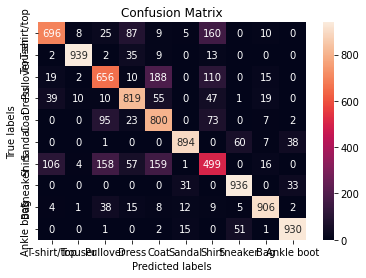

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);

In [67]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong
     

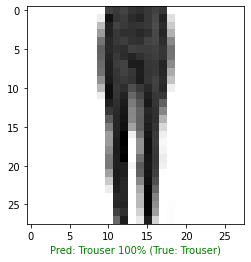

In [73]:
# Check out a random image as well as its prediction
plot_random_image(model=model_5,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on 
                  true_labels=test_labels,
                  classes=class_names)